In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
pose1_joints = {
    "rh_FFJ2": [0] * 150,
    "rh_FFJ3": [0] * 150,
    "rh_MFJ2": [0] * 150,
    "rh_MFJ3": [0] * 150,
    "rh_RFJ2": [0] * 150,
    "rh_RFJ3": [0] * 150,
    "rh_LFJ2": [0] * 150,
    "rh_LFJ3": [0] * 150,
    "rh_THJ2": [0] * 150,
    "rh_THJ3": [0] * 150,
}

pose2_joints = {
    "rh_FFJ2": [0] * 150,
    "rh_FFJ3": [0] * 150,
    "rh_MFJ2": [90] * 150,
    "rh_MFJ3": [90] * 150,
    "rh_RFJ2": [90] * 150,
    "rh_RFJ3": [90] * 150,
    "rh_LFJ2": [90] * 150,
    "rh_LFJ3": [90] * 150,
    "rh_THJ2": [50] * 150,
    "rh_THJ3": [30] * 150,
}

In [22]:
angle_order = {
    0: -90,
    1: -60,
    2: -30,
    3: 0,
    4: 30,
    5: 60,
    6: 90,
}

pose_joints = {
    1: pose1_joints,
    2: pose2_joints,
}

pose_joints_dfs = {key: pd.DataFrame(pose_joints[key]) for key in pose_joints.keys()}

In [23]:
pose = 2

pose_files = []
for i in range(-90, 91, 30):
    file_path = f"test_data/pose{pose}-angle{i}.csv"
    pose_files.append(pd.read_csv(file_path))

for i in range(len(pose_files)):
    for col in pose_files[i].columns:
        pose_files[i][col] = np.rad2deg(pose_files[i][col])
        
pose_files[0]

,rh_FFJ2,rh_FFJ3,rh_MFJ2,rh_MFJ3,rh_RFJ2,rh_RFJ3,rh_LFJ2,rh_LFJ3,rh_THJ2,rh_THJ3
0,0.513172,0.006365,53.272100,84.391773,63.554502,90.0,55.083150,90.0,2.225133,0.018263
1,0.303366,0.002273,53.760637,85.413449,64.195151,90.0,56.231207,90.0,4.620975,0.010397
2,0.443771,-0.004470,53.606748,86.934831,63.995674,90.0,56.168452,90.0,5.993873,0.043080
3,0.765739,0.032822,52.582712,83.171583,63.958274,90.0,56.031912,90.0,6.987447,0.082725
4,0.856771,0.015837,52.470766,84.181614,64.074720,90.0,56.217515,90.0,8.431362,0.099694
...,...,...,...,...,...,...,...,...,...,...
145,0.867157,0.008400,64.489522,78.801836,90.000000,90.0,87.701919,90.0,2.428793,0.014851
146,0.821061,-0.010400,64.665259,80.578121,89.772285,90.0,87.604459,90.0,3.595142,0.030996
147,0.790761,-0.005111,64.571827,80.966069,89.660118,90.0,87.412528,90.0,1.587200,0.027823
148,0.864720,0.034637,64.880644,77.880396,90.000000,90.0,88.289445,90.0,1.310204,0.056044


In [25]:
col_means = [pose_files[i] - pose_joints_dfs[pose] for i in range(len(pose_files))]

col_means = [abs(col_means[i].mean(axis=0)) for i in range(len(col_means))]

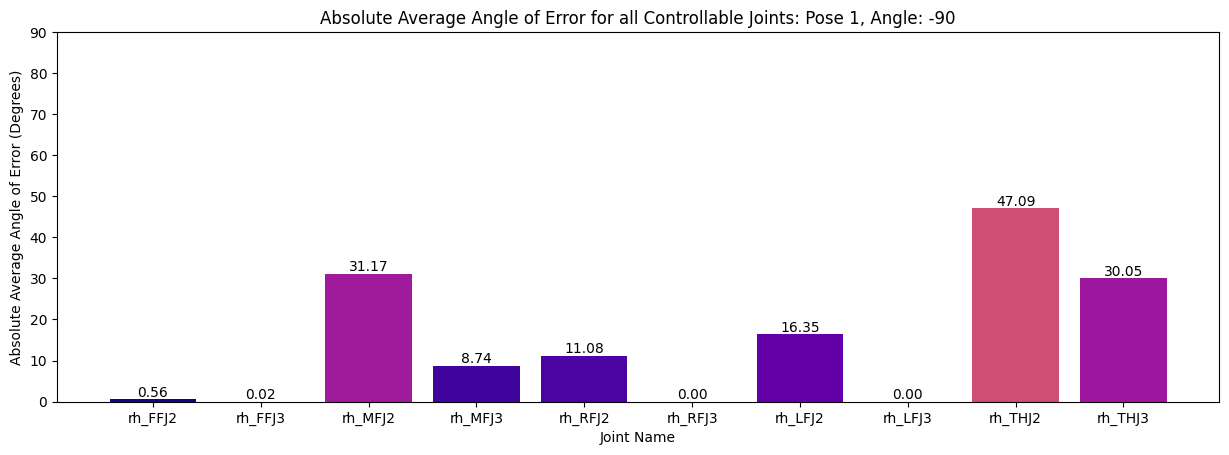

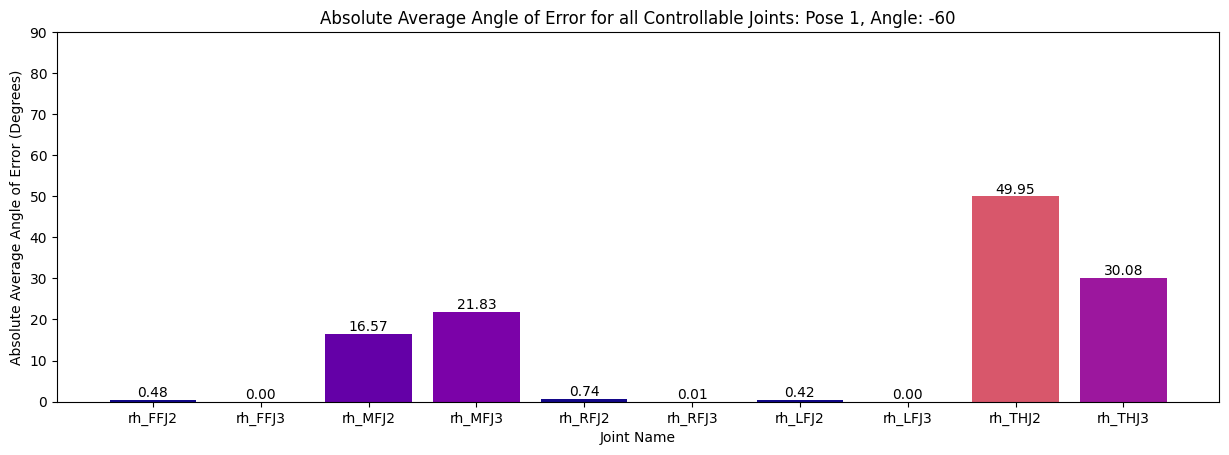

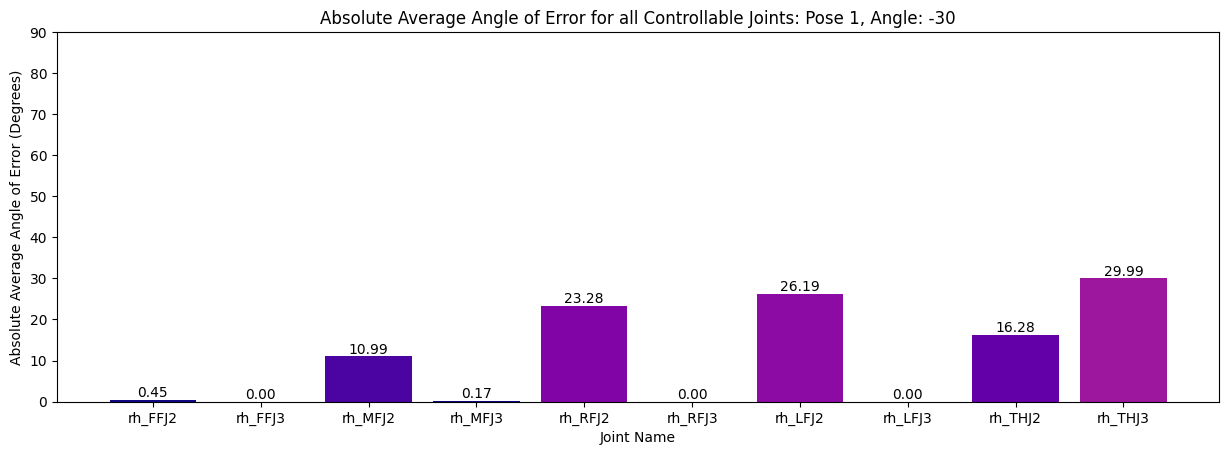

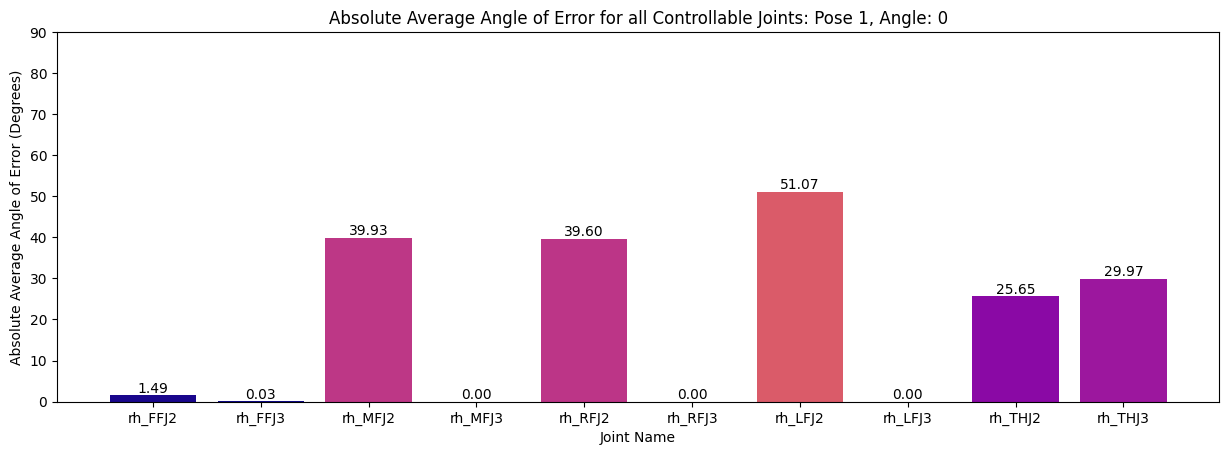

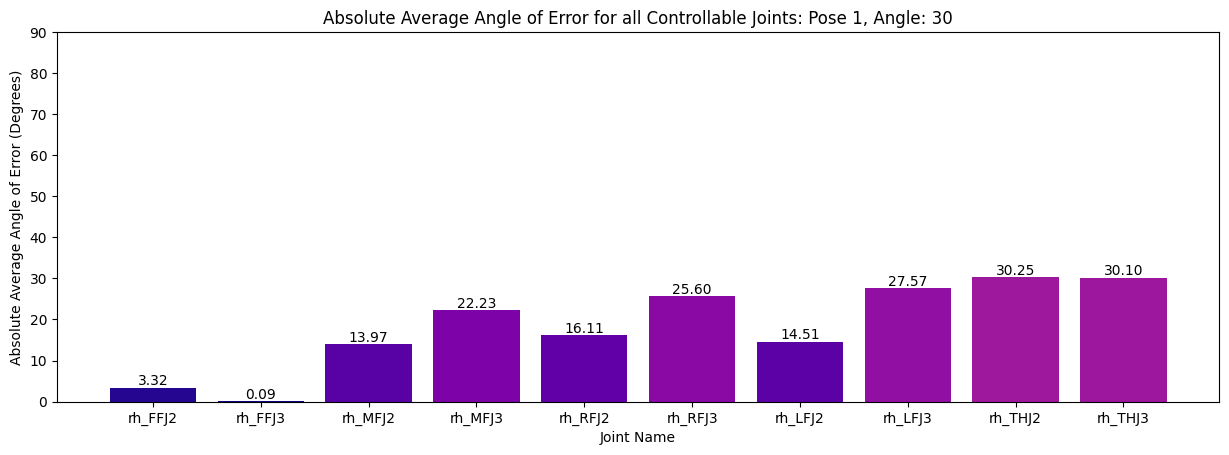

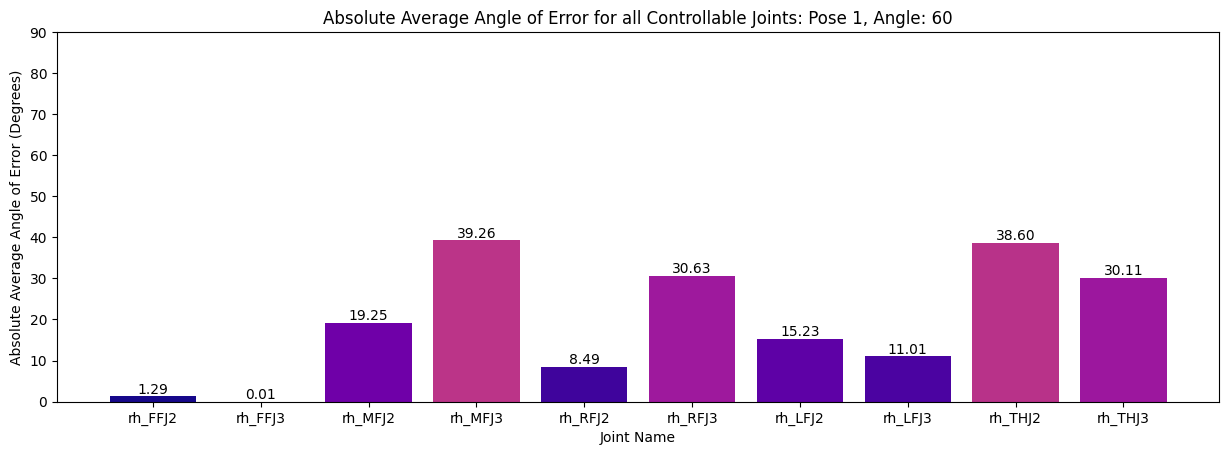

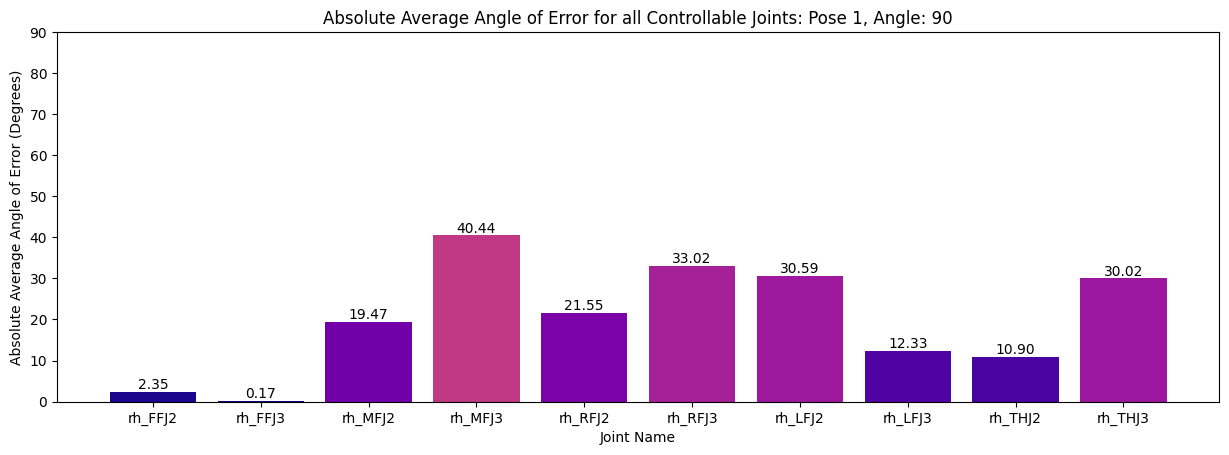

In [27]:
x = [i for i in range(len(col_means[i].keys()))]

my_cmap = plt.get_cmap('plasma')
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
rescale = lambda y: y / 90

for i, means in enumerate(col_means):

    plt.figure().set_figwidth(15)
    mean_bar = plt.bar(x=x, height=means.values, color=my_cmap(rescale(means.values)))
    plt.bar_label(mean_bar, fmt="%0.2f")
    plt.xlabel("Joint Name")
    plt.ylabel("Absolute Average Angle of Error (Degrees)")
    plt.ylim(0, 90)
    plt.title(f"Absolute Average Angle of Error for all Controllable Joints: Pose 1, Angle: {angle_order[i]}")
    plt.xticks(x, means.keys())
    plt.show()

In [28]:
col_ranges = [pose_files[i].max() - pose_files[i].min() for i in range(len(pose_files))]

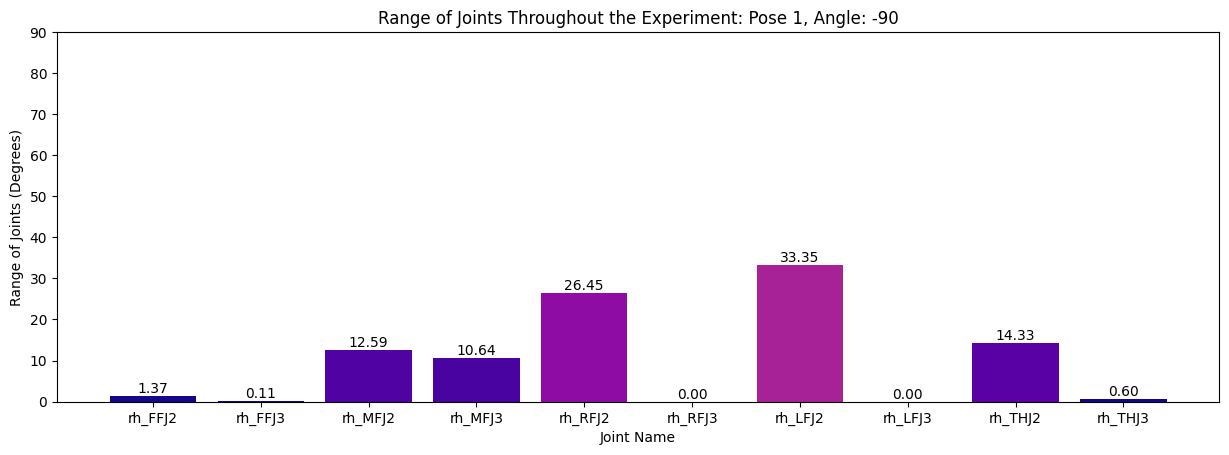

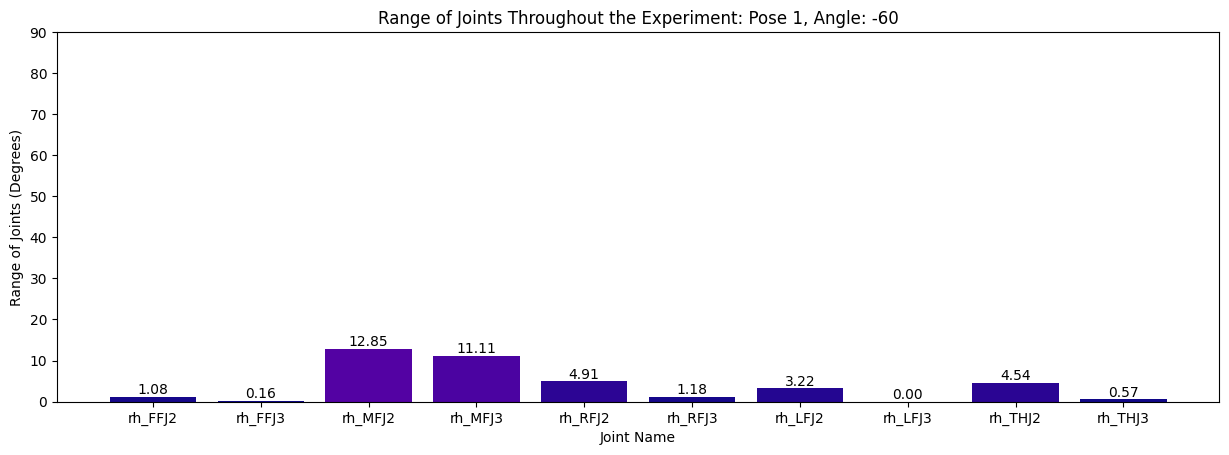

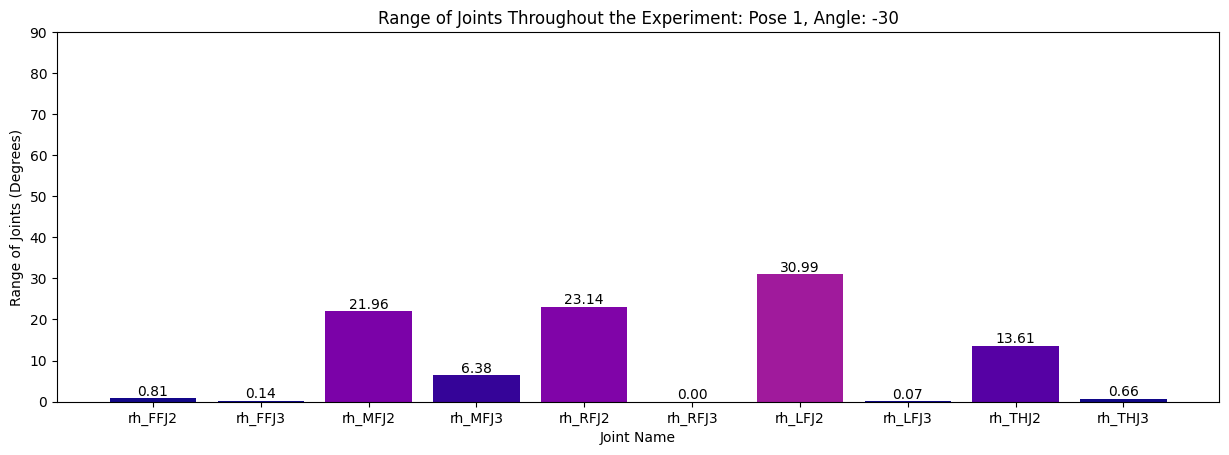

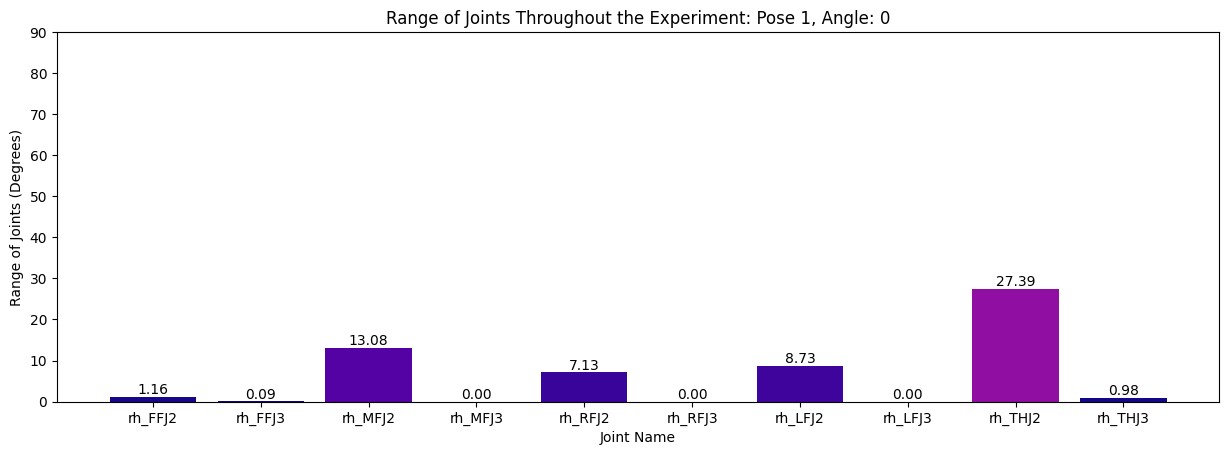

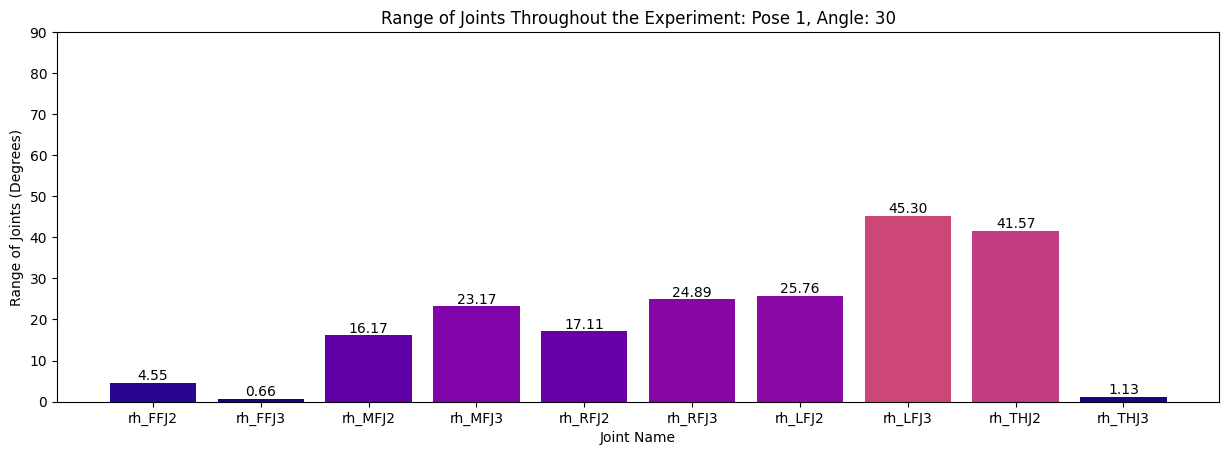

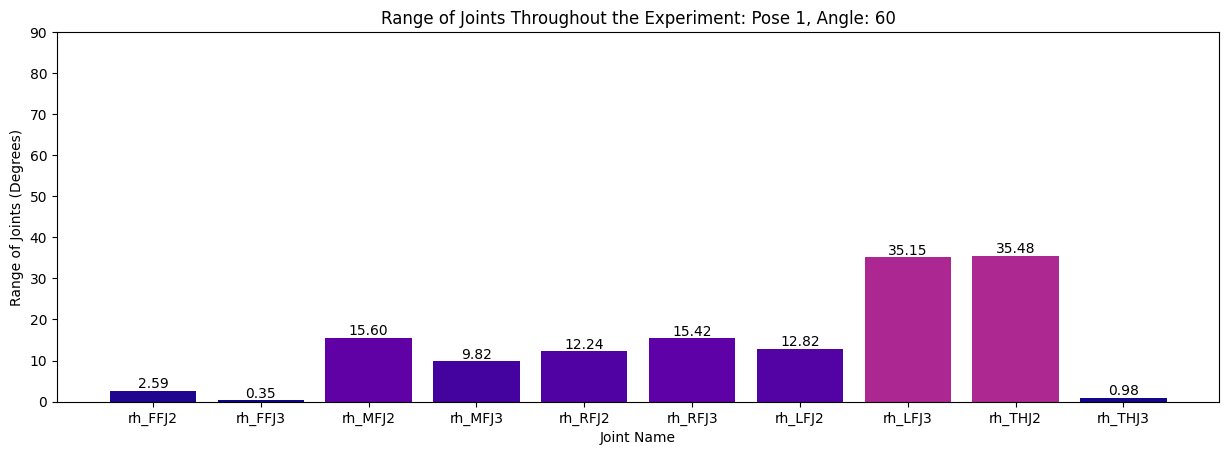

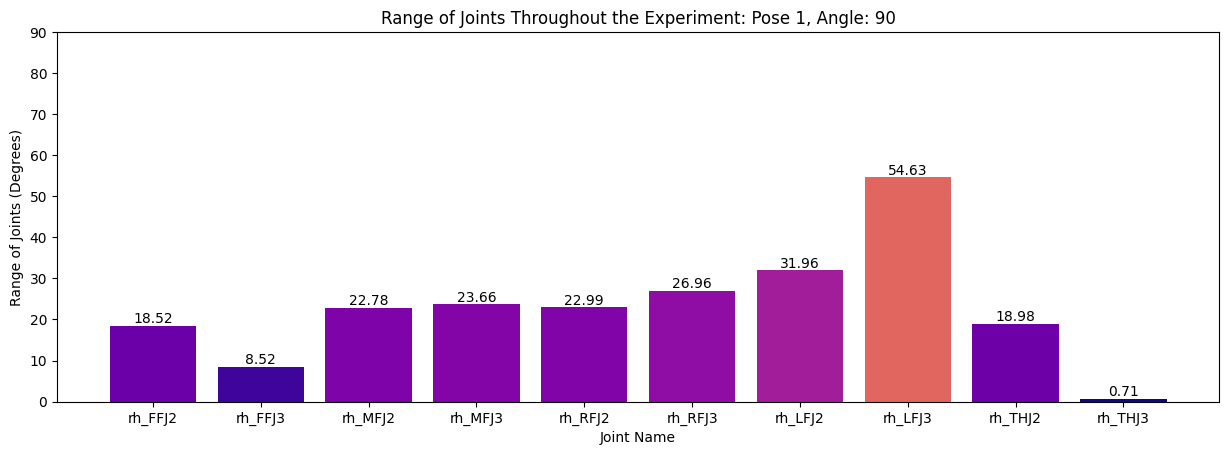

In [31]:
x = [i for i in range(len(col_ranges[i].keys()))]

my_cmap = plt.get_cmap('plasma')
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
rescale = lambda y: y / 90

for i, ranges in enumerate(col_ranges):

    plt.figure().set_figwidth(15)
    range_bar = plt.bar(x=x, height=ranges.values, color=my_cmap(rescale(ranges.values)))
    plt.bar_label(range_bar, fmt="%0.2f")
    plt.xlabel("Joint Name")
    plt.ylabel("Range of Joints (Degrees)")
    plt.ylim(0, 90)
    plt.title(f"Range of Joints Throughout the Experiment: Pose 1, Angle: {angle_order[i]}")
    plt.xticks(x, ranges.keys())
    plt.show()